In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors as KNN
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D

### Analysing the dataset to find the correlation between the different columns in the dataset and the price of real estate in Washington DC

This project is to analyze a dataset of real estate pricing in Washington DC. The main purpose of this project was for me to analyze the factors that affect the prices in property and houses in DC. The project has real world application since it can be used to predict the price of a property if all the information is provided. For this project I found an opensource dataset from Kaggle. This data set contains 158957 rows and  49 columns. As the analysis of data begins I remove 3 of these columns since they have a lot of null values and because they are not useful for predicting the required output. The goal of the project was to apply the 2 prediction models and one classificaiton model to this dataset to analyze the outputs.

In [83]:
#Loading the dataset and displaying the first 5 values and the last 5 values, as you can see in this dataset, there are 1589557 rows and 49 columns.
#Making sure the dataset loads and is displayed.
#This is a very large dataset with a lot of columns that may or may not affect the price of the houses in washington DC
df = pd.read_csv('DC_Properties.csv')
df

C:\Users\rhear\AppData\Local\Temp\ipykernel_25804\3610385625.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DC_Properties.csv')


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [28]:
#Displaying all the columns in this dataset to understand which columns should be conisdered in our analysis to find the correlation between these factors and the price
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
#displaying the sum of all the null values to create to remove the extra columns which have a lot of null values which do not have a high correlation
df.isnull().sum() #this shows that there are too many null values, this number reduces when we remove the columns with price null0

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [61]:
#dropping columns building number and Complex number since they have the highest null values and will not help in the analysis
#dropping column living gba as well since for the analysis we have other columns which we can find the correlation between 
#since these columns have a lot of null values it will provide an accurate prediction if they are removed.
df = df.drop(['CMPLX_NUM','LIVING_GBA','LIVING_GBA'], axis =1)
df

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [62]:
df.head()# displaying the first 5 rows

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [63]:
df.tail()#displaying the last 5 rows 

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW
158956,158956,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [64]:
#We consider the price column since it is the column of interest for the prediction
#It is clear from what can be seen in the output that there are Null Values in the price column
df['PRICE']

0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
            ...    
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
158956          NaN
Name: PRICE, Length: 158957, dtype: float64

In [65]:
#Creating a new dataset where the price is not null which is needed since we are finding the correlation between the price and the other columns
data_withoutna = df[np.isfinite(df['PRICE'])]
data_withoutna

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158951,158951,3,1,Forced Air,Y,NaN,5,3,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW


In [66]:
# Displaying the price column in the new dataset as it can be seen there are no null values in the price column in the dataset
data_withoutna['PRICE'] 

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
            ...    
158951     389000.0
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
Name: PRICE, Length: 98216, dtype: float64

In [67]:
newdf = data_withoutna.select_dtypes(exclude= object)
newdf= newdf.drop('Unnamed: 0', axis =1)#removing this coumn since its just the index values
newdf #we remove the values with datatype object
y= newdf.PRICE #y value has price since it is the value being predicted
X= newdf.drop('PRICE',axis=1)#the rest of the values are in this variable removing Price

#### Correlation Matrix for the given data, here the values can be clearly seen and the correlation between them is clearly visible along with the intensity in the color.

In [113]:
corr = data_withoutna.corr()
corr.style.background_gradient()

C:\Users\rhear\AppData\Local\Temp\ipykernel_25804\1083396329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_withoutna.corr()


,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
Unnamed: 0,1.000000,-0.431652,-0.416845,-0.016866,-0.616962,-0.624924,0.425988,-0.157652,-0.143931,-0.033365,0.033219,0.015828,-0.245260,-0.030886,0.003040,0.328095,-0.375211,0.102325,-0.174686,0.054882,0.117254,0.054623,-0.175339
BATHRM,-0.431652,1.000000,0.294066,0.383612,0.710764,0.709358,-0.071179,0.246807,0.245529,0.028327,-0.006536,0.047997,0.696760,0.401115,-0.002470,0.046665,0.440420,-0.055438,0.140767,-0.124557,-0.153948,-0.124652,0.140290
HF_BATHRM,-0.416845,0.294066,1.000000,-0.177140,0.394365,0.415386,-0.045465,0.167185,0.231376,0.032569,-0.013113,0.004567,0.257064,-0.154734,-0.002226,-0.268655,0.323970,-0.022462,0.122739,-0.026506,-0.058225,-0.026495,0.122925
NUM_UNITS,-0.016866,0.383612,-0.177140,1.000000,0.537695,0.340115,-0.111175,-0.030150,-0.124966,0.009943,-0.000469,-0.005458,0.286374,0.911839,-0.041616,0.804437,-0.056729,-0.090734,-0.122228,0.053378,0.078658,0.053333,-0.122049
ROOMS,-0.616962,0.710764,0.394365,0.537695,1.000000,0.847760,-0.225328,0.202394,0.164268,0.025786,-0.038241,-0.006762,0.680618,0.528950,-0.004489,-0.077584,0.514334,-0.038854,0.108679,0.042700,-0.051099,0.042651,0.108208
BEDRM,-0.624924,0.709358,0.415386,0.340115,0.847760,1.000000,-0.248506,0.253108,0.170732,0.026312,-0.043331,0.001923,0.645725,0.352900,-0.005711,-0.155103,0.514365,-0.057727,0.139648,0.062317,-0.053429,0.062255,0.139238
AYB,0.425988,-0.071179,-0.045465,-0.111175,-0.225328,-0.248506,1.000000,0.003346,0.684361,-0.004003,0.056041,-0.016159,0.035662,-0.118075,0.001507,0.076851,-0.090143,0.147316,-0.132196,0.030052,0.115728,0.030405,-0.131768
YR_RMDL,-0.157652,0.246807,0.167185,-0.030150,0.202394,0.253108,0.003346,1.000000,0.256893,-0.003363,0.030072,0.113512,-0.019663,-0.013625,0.001339,-0.130988,0.118823,-0.097497,0.017922,0.203014,0.110935,0.202761,0.017546
EYB,-0.143931,0.245529,0.231376,-0.124966,0.164268,0.170732,0.684361,0.256893,1.000000,0.033950,0.049627,0.018861,0.284936,-0.102144,-0.000198,-0.092560,0.116174,0.036502,-0.089961,0.042612,0.067128,0.042817,-0.089729
STORIES,-0.033365,0.028327,0.032569,0.009943,0.025786,0.026312,-0.004003,-0.003363,0.033950,1.000000,0.042337,0.009877,0.042322,0.011565,0.027901,0.011379,-0.014466,-0.019166,-0.004236,-0.023411,-0.017675,-0.023446,-0.004154


#### The heatmap of the given dataframe with all the values, there are values which have very high positive correlation such as the number of units and the number of kitchens as well as the Latitude and the Y axis.

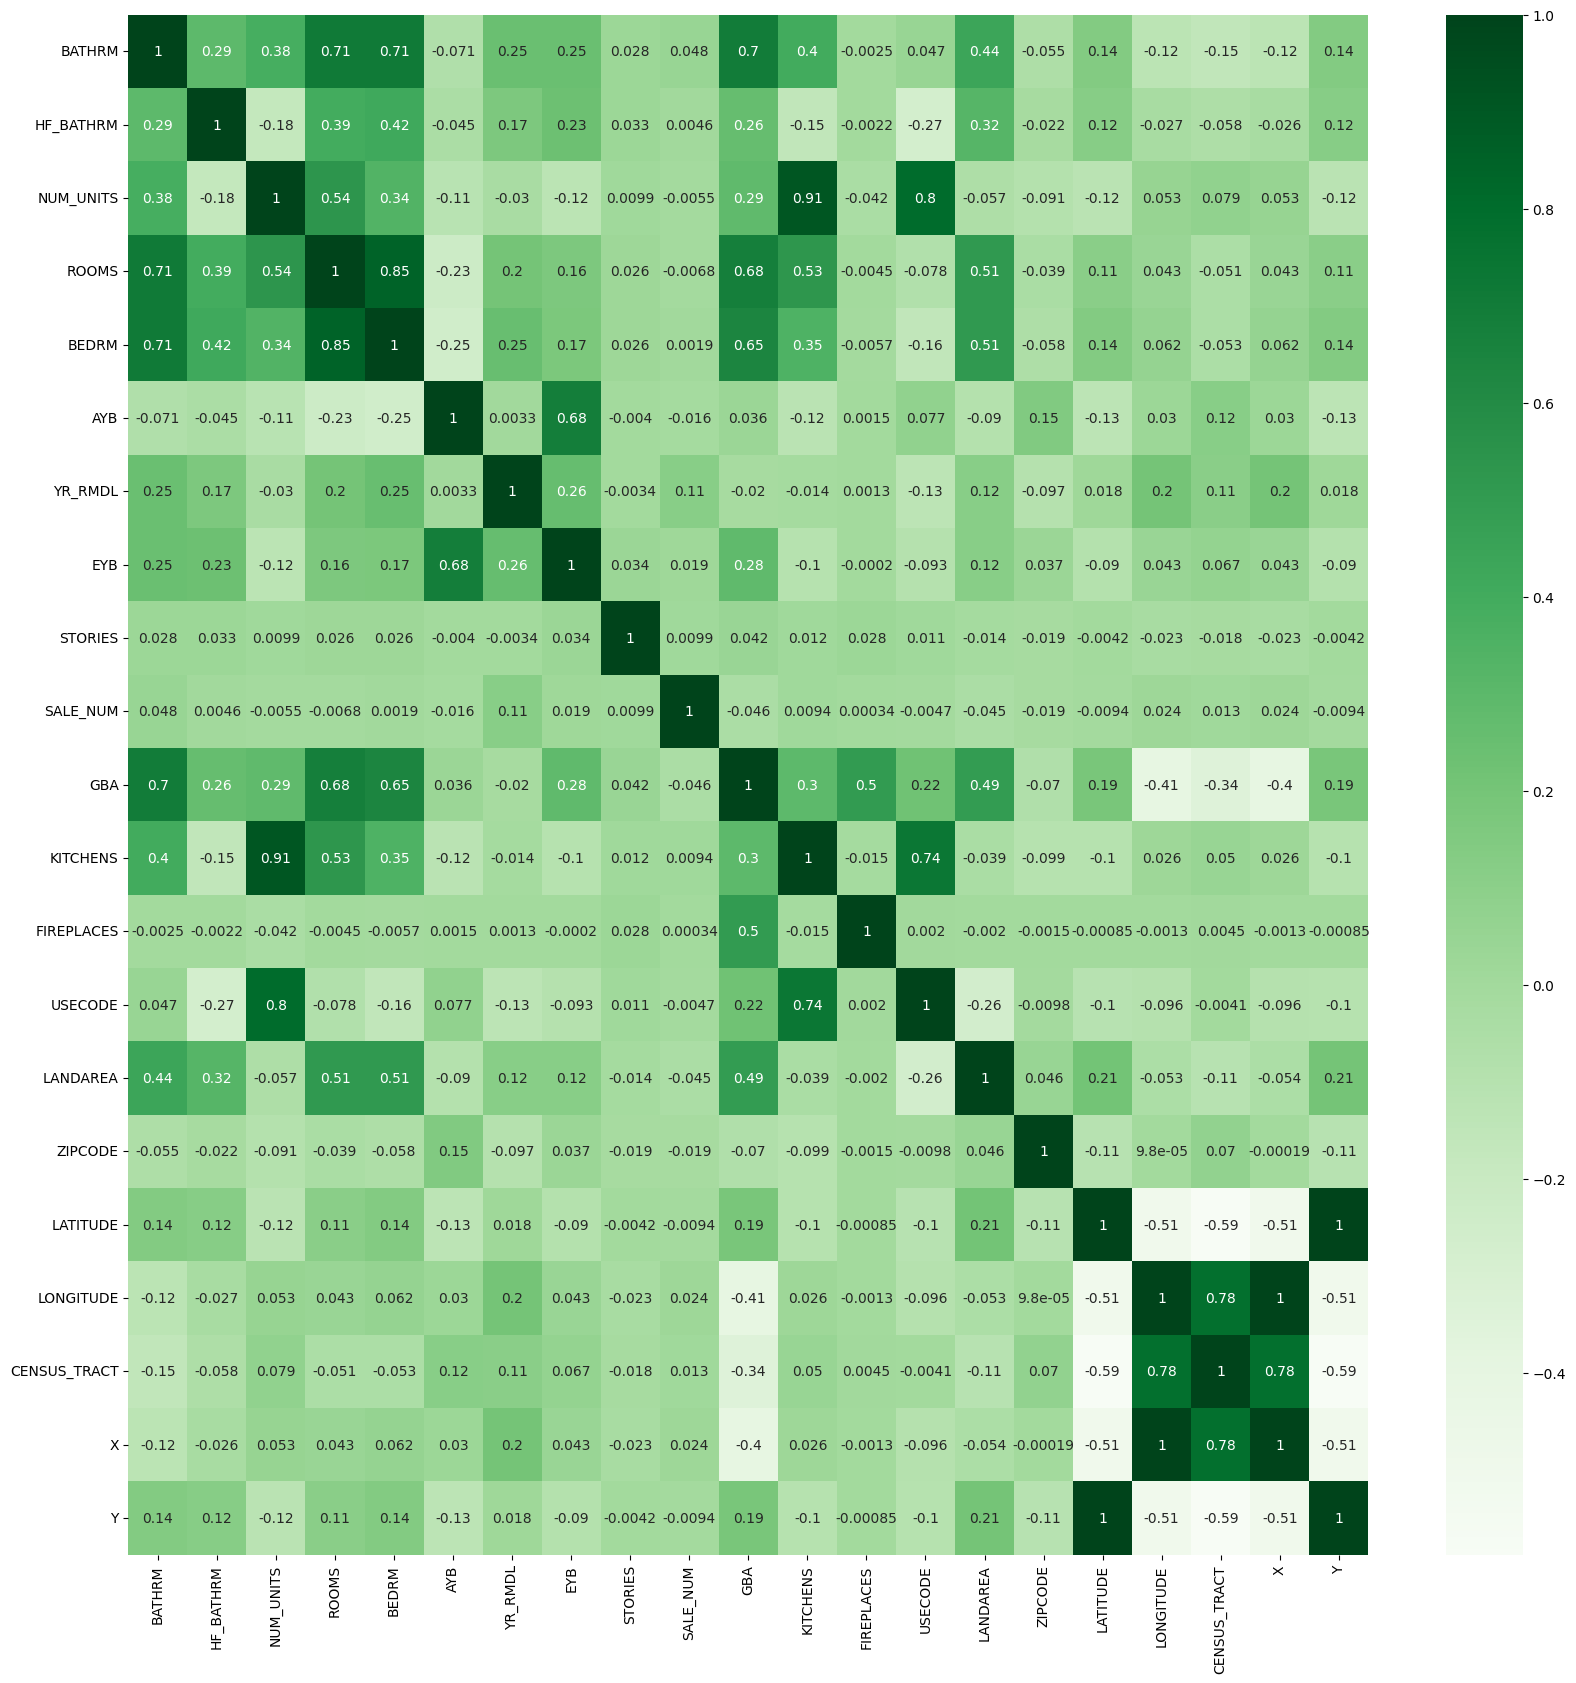

In [68]:
#Plotting the correlation matrix for the data in this you can clearly see the correlation numbers on the matrix with the color also indicating the correlation numbers 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap="Greens")
plt.show()

In [69]:
newdf.describe() #describing the dataset since there are a lot of null values, this allows me to analyze the data and see the 

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,98216.000000,98216.000000,57900.000000,98216.000000,98216.000000,98104.000000,57674.000000,98216.000000,57867.000000,9.821600e+04,...,57899.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98216.000000,98115.000000,98115.000000
mean,1.859157,0.444541,1.221071,5.921836,2.606480,1944.903888,2000.666748,1965.759876,2.124667,9.313516e+05,...,1.250902,3.521972,14.613393,2084.296123,20012.303525,38.913911,-77.018076,5289.710220,-77.018101,38.913903
std,0.978321,0.576217,0.623997,2.637816,1.393801,36.254098,16.136807,27.500116,3.948764,7.061325e+06,...,0.661330,937.972785,3.683449,2765.429658,16.326982,0.030185,0.039794,3288.288804,0.039786,0.030161
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,0.000000,0.000000,11.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1917.000000,1991.000000,1954.000000,2.000000,2.400000e+05,...,1.000000,0.000000,11.000000,482.000000,20005.000000,38.895973,-77.042758,2201.000000,-77.042768,38.895753
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1939.000000,2005.000000,1965.000000,2.000000,3.999990e+05,...,1.000000,0.000000,13.000000,1380.000000,20010.000000,38.914207,-77.021489,5002.000000,-77.021262,38.914181
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,6.520000e+05,...,1.000000,1.000000,17.000000,2556.000000,20017.000000,38.933797,-76.990601,8100.000000,-76.990849,38.933756
max,12.000000,11.000000,6.000000,31.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,44.000000,293920.000000,117.000000,187301.000000,20392.000000,38.995435,-76.909758,11100.000000,-76.910511,38.993646


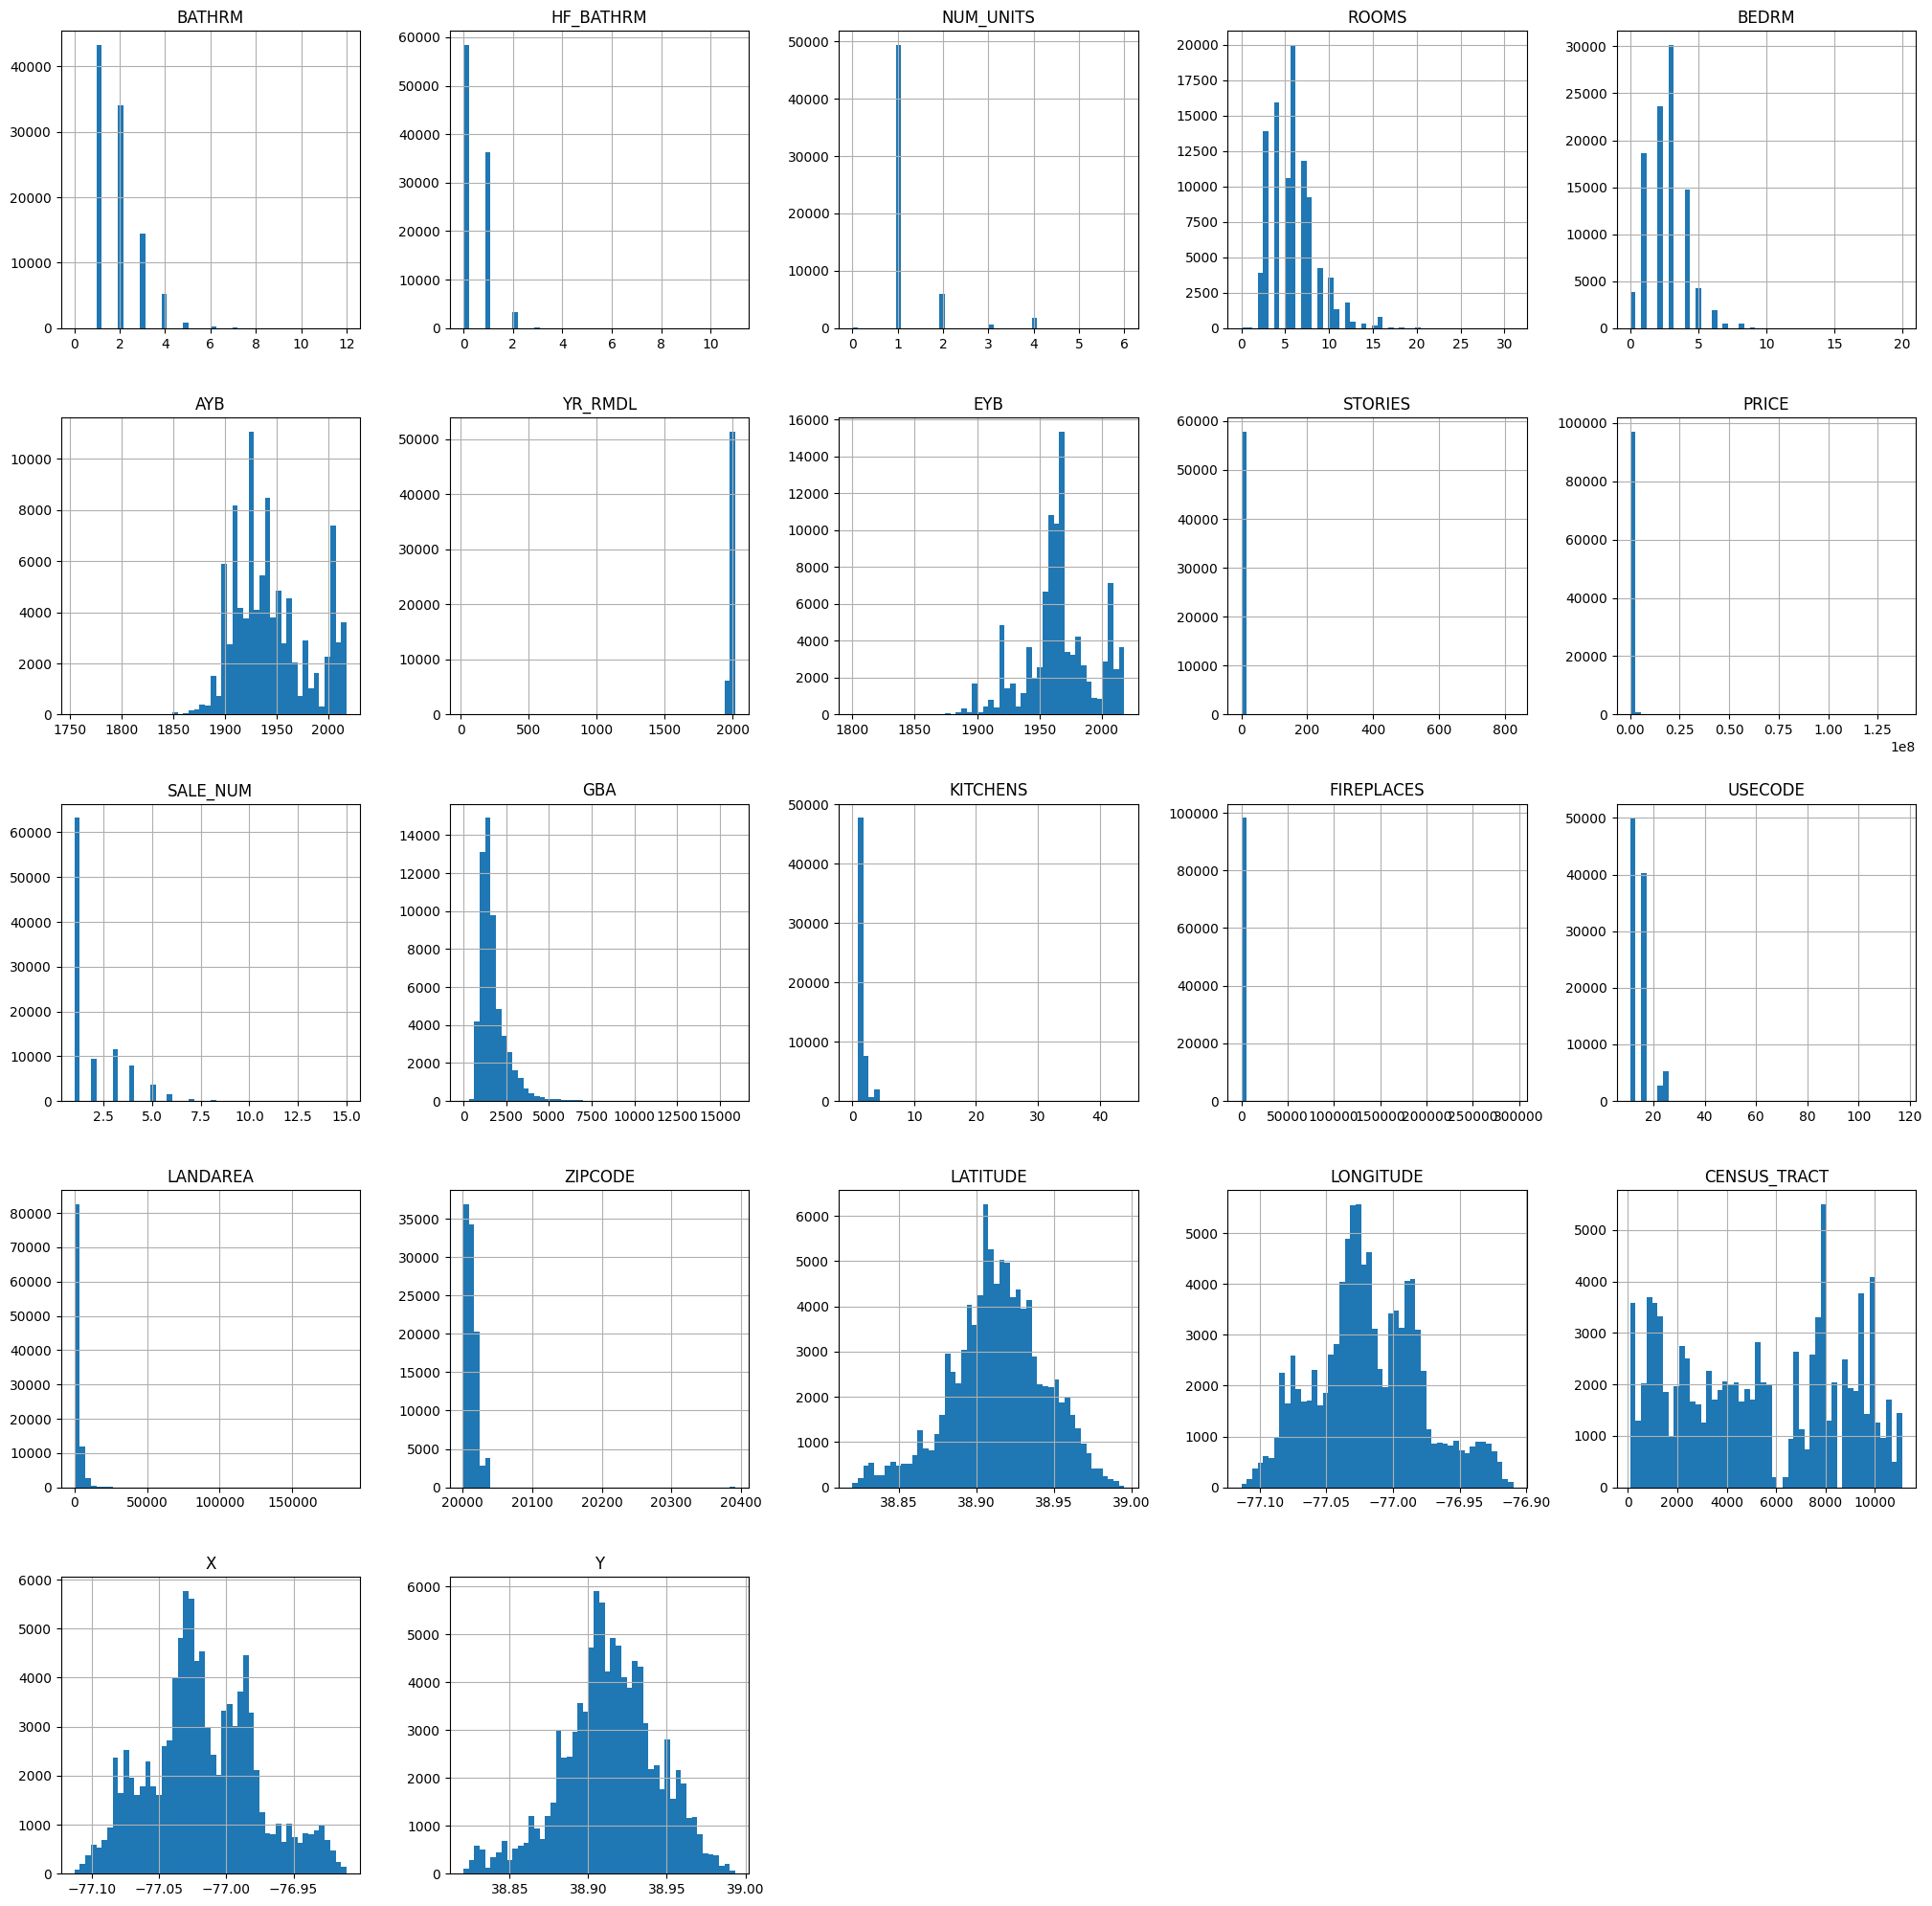

In [70]:
#this plots all the graphs with corresponding axes, the data is clearly labelled and you can see the different values and the corresponding the 
newdf.hist(figsize=(25,25),bins=50);

In [71]:
from sklearn.model_selection import train_test_split
#partitioning the data into training set and test set with a 60 - 40 ratio
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.4,random_state=1)

### Displaying all the outputs that we get from splitting the dataset

In [72]:
X_train

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
126380,2,0,NaN,4,2,2002.0,NaN,2002,NaN,1,...,NaN,0,17,323,20016.0,38.951565,-77.080688,1100.0,-77.080691,38.951572
3566,2,0,2.0,7,3,1900.0,1980.0,1954,2.0,1,...,2.0,0,23,1615,20001.0,38.911695,-77.018313,4801.0,-77.017627,38.911776
28146,3,1,1.0,10,4,1940.0,2001.0,1972,1.5,1,...,1.0,1,12,4750,20016.0,38.949269,-77.094090,1001.0,-77.093499,38.949276
69668,2,0,1.0,6,3,1940.0,2005.0,1964,2.0,1,...,1.0,0,11,2975,20017.0,38.946931,-76.990479,9509.0,-76.991433,38.946785
8400,2,0,1.0,5,2,1912.0,2004.0,1964,2.0,4,...,1.0,0,11,1177,20002.0,38.904255,-76.997152,10600.0,-76.997428,38.904712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127901,1,0,NaN,3,1,1955.0,2005.0,1955,NaN,1,...,NaN,0,16,512,20011.0,38.943387,-77.006485,9501.0,-77.006487,38.943394
91167,2,0,1.0,4,3,1931.0,2003.0,1964,1.0,1,...,1.0,0,12,4000,20019.0,38.888292,-76.928115,9904.0,-76.928889,38.888269
158746,2,0,NaN,4,2,2005.0,2005.0,2005,NaN,1,...,NaN,0,17,113,20001.0,38.902129,-77.019596,4702.0,-77.019599,38.902137
8817,4,0,4.0,11,4,1883.0,2009.0,1969,3.0,4,...,4.0,1,24,1059,20003.0,38.885876,-77.000816,6500.0,-77.001467,38.885819


In [73]:
X_test

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
122413,2,1,NaN,6,2,1930.0,1983.0,1930,NaN,1,...,NaN,1,16,982,20009.0,38.913210,-77.037668,5301.0,-77.037670,38.913217
17742,3,1,1.0,10,4,1949.0,2001.0,1971,2.0,4,...,1.0,1,11,1450,20002.0,38.892741,-76.983844,8002.0,-76.984758,38.892904
156205,3,0,NaN,5,2,1965.0,NaN,1965,NaN,1,...,NaN,0,16,1626,20024.0,38.875665,-77.018649,11000.0,-77.018651,38.875672
44448,2,1,1.0,7,3,1941.0,1992.0,1969,2.0,1,...,1.0,2,12,6474,20012.0,38.990081,-77.044935,1600.0,-77.045101,38.990014
18785,2,0,1.0,8,3,1925.0,2005.0,1967,2.0,5,...,1.0,0,11,2000,20003.0,38.885913,-76.979901,6801.0,-76.979838,38.886651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114415,1,1,NaN,3,2,1908.0,1993.0,1900,NaN,1,...,NaN,1,16,401,20009.0,38.915902,-77.042363,4202.0,-77.042365,38.915909
36110,3,1,1.0,11,6,1913.0,2014.0,1972,2.5,1,...,1.0,2,12,7625,20016.0,38.937102,-77.067322,600.0,-77.067325,38.936918
37136,7,1,1.0,12,6,1949.0,2015.0,1993,2.0,4,...,2.0,1,12,11871,20008.0,38.922837,-77.057162,400.0,-77.056439,38.922097
33480,4,2,1.0,9,4,1940.0,2011.0,1972,2.5,1,...,1.0,3,12,5845,20007.0,38.926360,-77.069192,400.0,-77.069204,38.927241


In [74]:
y_train

126380     317595.0
3566       105000.0
28146     1452000.0
69668      353500.0
8400       708500.0
            ...    
127901     201000.0
91167      169900.0
158746     489900.0
8817      1118358.0
133771     625000.0
Name: PRICE, Length: 58929, dtype: float64

In [75]:
y_test

122413     640000.0
17742     1000000.0
156205     561000.0
44448      249000.0
18785      770000.0
            ...    
114415     159000.0
36110     1250000.0
37136     3000000.0
33480     1380000.0
138990     419900.0
Name: PRICE, Length: 39287, dtype: float64

In [76]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

### Model 1 Random Forest Regressor

The random forest model worked very efficiently for my data, as it can be seen from the visualization the actual and the predicted graphs are very similar. This algorithm works well across a wide range of situations, especially worked well for my dataset since there was a huge amount of data with a lot of different dependencies and variables. This model can be improved by using random subsets of predictors and taking multiple estimates than just using a single one. The libraries in scikit learn made it easy to used the RandomForestRegressor function. Even after imputation of the final prediction of this model ended up being very good. The random forest regressor is used since it is better for numeric or continuous outputs.

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


model1 = RandomForestRegressor()
model1.fit(imputed_X_train, y_train)
preds = model1.predict(imputed_X_test)
MAE = mean_absolute_error(y_test, preds)
print(preds)
print("Mean Absolute Error from Imputation:")
print('MAE : ', MAE)

r_square= r2_score(y_test,preds) 
print('R square: ',r_square)



[ 768128.          990943.8         287540.05808081 ... 2903953.6
 1520360.          559289.92      ]
Mean Absolute Error from Imputation:
MAE :  324592.3288109398
R square:  0.657904383689355


In the above output we can clearly see the mean error from imputation.
I had to use imputation in my models since there were a lot of null values which were causing errors in prediction, even though this was the tcase the overall accuuracy of the model was not greatly affected by it.
In general, an R-Squared value of 0.5 would be seen as OK. This would indicate that half of the dependent variable variance is explained by the model's independent variables. Here we see the value is .65 which means the model explains about 65% of the variation in our dependent variable.

Below, we can see the the lengths of the test data and the prediction datasets being displayed and the final output shows the values side by side to show a comparison of how accurate the values are.

In [105]:
print(len(preds))
print(len(y_test))
print(preds[0:5])
print(y_test[0:5])

39287
39287
[768128.         990943.8        287540.05808081 541576.08
 729982.03      ]
122413     640000.0
17742     1000000.0
156205     561000.0
44448      249000.0
18785      770000.0
Name: PRICE, dtype: float64


C:\Users\rhear\AppData\Local\Temp\ipykernel_25804\2832067849.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[0:5])


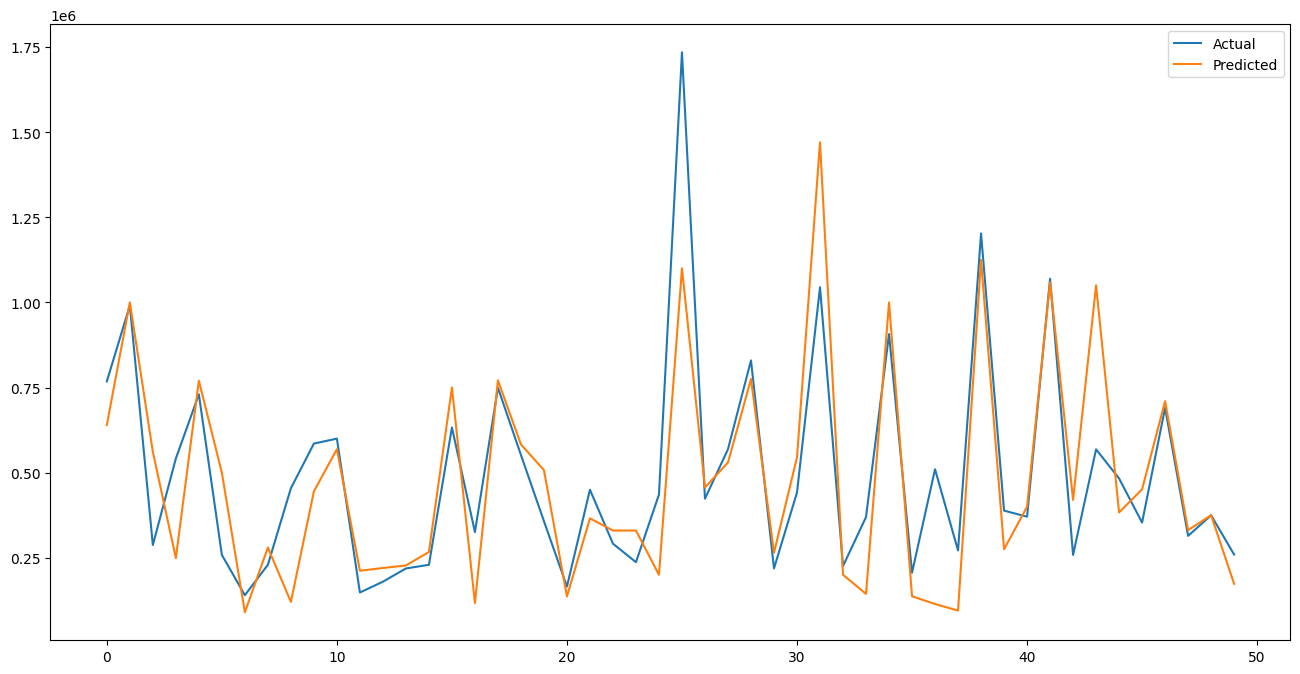

In [108]:
test = pd.DataFrame({'Predicted':preds,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
-plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

This is the final graph for the Random forest model, in which you can see the lines for the actual and the predicted values.

         feature  importance       std
8        STORIES    0.000298  0.001678
15       ZIPCODE    0.000638  0.001994
20             Y    0.000896  0.001777
16      LATITUDE    0.000944  0.002169
2      NUM_UNITS    0.001291  0.005141
11      KITCHENS    0.001395  0.005136
13       USECODE    0.001847  0.005302
10           GBA    0.002047  0.001953
7            EYB    0.004959  0.009031
0         BATHRM    0.005451  0.011632
18  CENSUS_TRACT    0.006369  0.008787
3          ROOMS    0.008106  0.008107
12    FIREPLACES    0.009151  0.006296
4          BEDRM    0.012847  0.012883
1      HF_BATHRM    0.013089  0.008690
6        YR_RMDL    0.035161  0.015265
19             X    0.057780  0.115375
14      LANDAREA    0.061802  0.019797
9       SALE_NUM    0.102721  0.017254
5            AYB    0.137580  0.194475
17     LONGITUDE    0.535628  0.217450


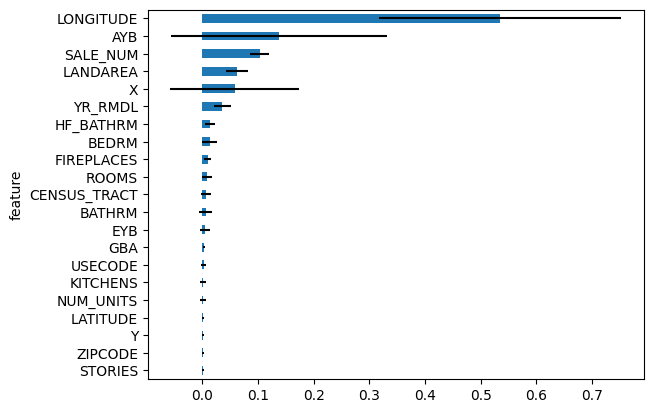

Variable importance plot from Random Forest


In [122]:

# Variable Importance Plot and output for Random Forest Regressor
importances = model1.feature_importances_
std = np.std([tree.feature_importances_ for tree in model1.estimators_], axis =0)
df = pd.DataFrame({'feature':X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind ='barh', xerr ='std', x ='feature', legend = False)
ax.set_label('')
plt.show()
print('Variable importance plot from Random Forest')



### Model 2 Linear Regression Model

Linear regression model was used in the project since it is a very basic model, it predicts the outcome variable Y based on one or more input predictor variables. This model works in finding weights that lead to the best fitting data. As it can be seen from the outputs of this model, it was not very accurate for the dataset that I chose. The predictions were off by a lot and there was almost no correlation between the actual and the predicted dataset. 

In [94]:
from sklearn.linear_model import LinearRegression as lm 
from sklearn.metrics import r2_score


model = lm().fit(imputed_X_train,y_train)
model.fit(imputed_X_train, y_train)
preds = model.predict(imputed_X_test)

MAE=mean_absolute_error(y_test, preds)


print("Mean Absolute Error from Imputation:")
print('MAE :', MAE)

r_square= r2_score(y_test,preds) 
print('R square : ',r_square)

print("Intercept is "+ str(model.intercept_))
print ("Coefficients is " + str(model.coef_))


Mean Absolute Error from Imputation:
MAE : 1219559.4973333783
R square :  0.0182385546677728
Intercept is -1366125631.955638
Coefficients is [-1.97058625e+05 -1.33325142e+05  1.53083319e+05 -9.46374526e+04
 -1.68601609e+05  1.10671264e+03  2.55573676e+04  1.56182808e+04
  6.29834604e+02 -8.89142987e+04  3.66216053e+02  3.19553924e+05
  3.12127668e+02 -9.58145148e+03  2.50668453e+01  3.01223232e+01
 -7.83554512e+05 -5.35445491e+06 -1.42228956e+01 -9.65759485e+06
  4.04242440e+06]


In this model we can see the r square value ended up being 0.01 which is very low which would explain the poor outputs, since the greater the Rsquare value the better the output.

In [97]:
# predicting on test data
y_pred = model.predict(imputed_X_test)
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

39287
39287
[ 236949.94642878 -671617.05683422  830625.72381401 1431118.84444094
 -182235.95092916]
122413     640000.0
17742     1000000.0
156205     561000.0
44448      249000.0
18785      770000.0
Name: PRICE, dtype: float64


C:\Users\rhear\AppData\Local\Temp\ipykernel_25804\4043269524.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[0:5])


From the output it is clear that the prediction is not close to the actual values

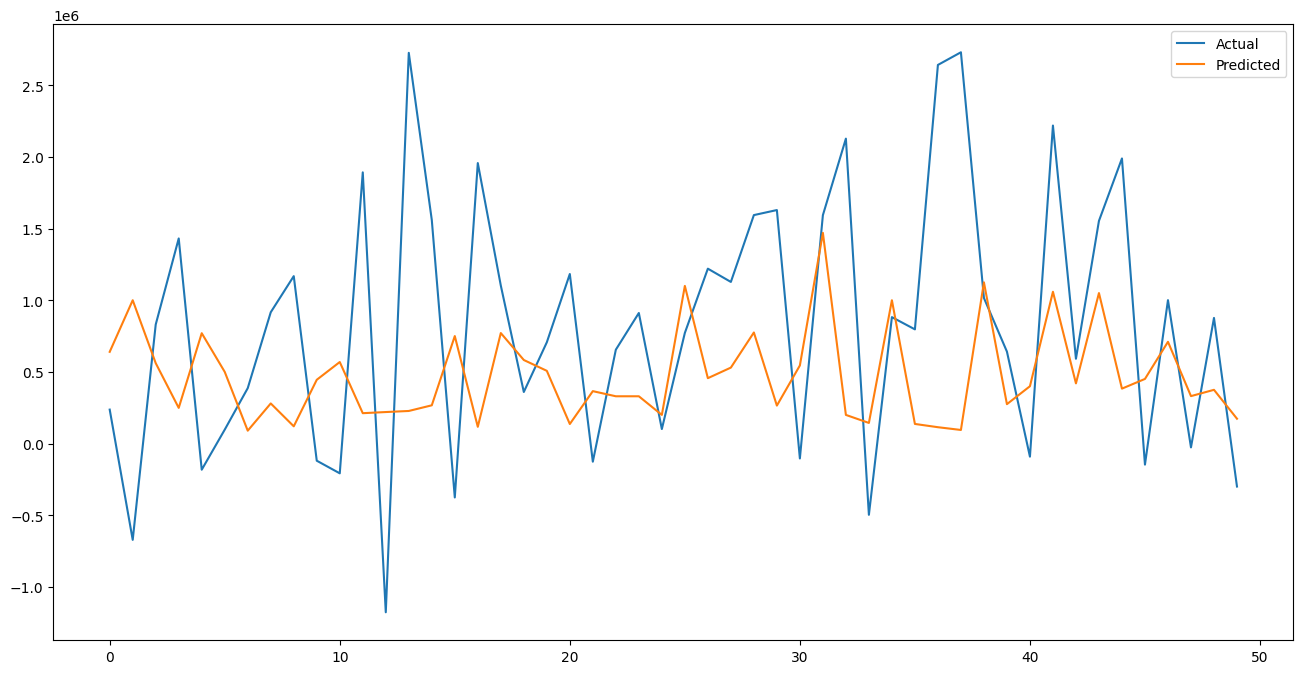

In [101]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])


### Model 3 K-nearest neighbour

This model uses the neighbouring models to predict where a new variable or record stands. I used this algorithm since we discussed it in class and that it would be good to used with Real Estate Data. I think this algorithm was pretty effiecent when the k value is 3/4 which was good. I initially used the same algorithm on the data without removing the 3 columns from the dataset which lead to varying accuracies in the k value. The values were not as good or related as the percenteages in the k values that are obtained below.  The low k values shows that not a lot of noise was taken into account for the prediction which shows a more accurate value.

The data shown below is the accuracy for the corresponding k values, as it can be seen the k value peaks at k=4 which is almost equal to k =3 

In [80]:
#finding a row in the dataframe to check if the prediction of the algorithm is correct
# we consider a random row which is 400 and input the values to predict the price 
newdf.iloc[400]
newdf

BATHRM          2.000000e+00
HF_BATHRM       1.000000e+00
NUM_UNITS       1.000000e+00
ROOMS           8.000000e+00
BEDRM           2.000000e+00
AYB             1.906000e+03
YR_RMDL         2.007000e+03
EYB             1.972000e+03
STORIES         4.000000e+00
PRICE           1.479000e+06
SALE_NUM        1.000000e+00
GBA             3.300000e+03
KITCHENS        1.000000e+00
FIREPLACES      3.000000e+00
USECODE         1.100000e+01
LANDAREA        1.424000e+03
ZIPCODE         2.000800e+04
LATITUDE        3.891278e+01
LONGITUDE      -7.704698e+01
CENSUS_TRACT    5.500000e+03
X              -7.704686e+01
Y               3.891306e+01
Name: 673, dtype: float64

In [86]:
Given_data = np.array([[2.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,2.000000e+00, 1.906000e+03,2.007000e+03, 1.972000e+03,4.000000e+00, 1.000000e+00, 3.300000e+03, 1.000000e+00, 3.000000e+00,1.100000e+01, 1.424000e+03, 2.000800e+04, 3.891278e+01,-7.704698e+01, 5.500000e+03,-7.704686e+01,3.891306e+01]])
n.predict(Given_data)

array([1435428.57142857])

In [109]:
n.predict(imputed_X_train)

array([ 312576.        ,  472666.66666667, 1425666.66666667, ...,
        581800.        ,  579452.66666667,  567666.66666667])

In [89]:
data_withoutna.iloc[400]

Unnamed: 0                            673
BATHRM                                  2
HF_BATHRM                               1
HEAT                            Warm Cool
AC                                      Y
NUM_UNITS                             1.0
ROOMS                                   8
BEDRM                                   2
AYB                                1906.0
YR_RMDL                            2007.0
EYB                                  1972
STORIES                               4.0
SALEDATE              2007-02-20 00:00:00
PRICE                           1479000.0
QUALIFIED                               Q
SALE_NUM                                1
GBA                                3300.0
STYLE                             4 Story
STRUCT                         Row Inside
GRADE                           Very Good
CNDTN                                Good
EXTWALL                      Common Brick
ROOF                             Built Up
INTWALL                          H

As it can be seen in the above data the prediction there is an error in the price predicted and the price that the data is shown, in the below error prediction for the K nearest algorithm it is clear that there is a 27% error.
The actual price of the house with the data is 1479000 whereas the predicted price is 1435428 approximately.
I used the same data from the dataframe to predict the analysis since there were multiple column values which needed to be entered and the output would be clearly visible

The K- nearest neighbour algorithm worked well with my data since it is we can see with the amount of data that is present in this dataset, k value of 3 worked well, since 3 and 4 are almost the same accuracy I chose 3 for the analysis. The error percentage for this model was pretty low and I think it was a good model to use.

In [91]:
n= KNR(n_neighbors= 3)
n.fit(imputed_X_train,y_train)
print("The Error will be", (100  - n.score(imputed_X_train, y_train)*100),"%")

The Error will be 27.04745178608117 %


## Conclusion 
This project helped me further my understanding of Data Analysis. I used 2 prediction models which were the Random Forest Regressor and Linear Regression model as well as a classifier which was the K-nearest neighbour algorithm to analyze the data in this dataset. Overall I think this project was very helpful for me to understand the analysis of datasets from a business perspecitve. It allowed me to use machine learning to algorithms to analyze and predict data which gave me more insight into how prices of different houses would be affected by the different characterestic properties in the given datasets. I ran the algorithms multiple times to confirm the working and accurate analysis. 
There were many challenges that I faced with this dataset, I think one of the most prominent ones was that the dataset was very large, there were a lot of columns that I would love to analyze further to understand the individual importance and impact on the price of the houses. I feel like since there were a lot of Null values I had to use the impute the training and the test datasets which caused the prediction values to be skewed from the original. 

Future plans and improving the project.
I used the resources available to conduct a very preliminary analysis of this dataset. If the dataset had less null values, it would be more accurate to conduct analyses on it. I would like to analyze Zillows dataset, which would build on the fundamentals of this project since it would continue working with real estate data. I was able to understand the correlation between the different variables from the visualizations that were produced. 
The practical applications of this project includes that it can be used to predict price of houses to purchase and using more recent and accurate data would allow for a real world application of this analysis.